# Section 1: Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis 
for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled 
wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock 
belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona 
pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come 
up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, 
and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine
situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs 
once the situation gets better all around and stand out from other service providers and make huge profits.They have contracted
a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to 
understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:Which variables 
are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands based on various meteorological surveys and people's styles, the service provider 
firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


 

# Section 2: Business Goal
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand 
how exactly the demands vary with different features.They can accordingly manipulate the business strategy to meet the demand 
levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand 
dynamics of a new market.

Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================

# Section 3: Reading and Understanding the Data


In [89]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [90]:
#importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

#Setting option to diaply maximum rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [91]:
#Checking the version of the libraries
#Panda's version
print('panda version:',pd.__version__)
#Numpy's version
print('Numpy version:',np.__version__)
#Seaborn's version
print('Seaborn version:',sns.__version__)


panda version: 1.2.4
Numpy version: 1.20.1
Seaborn version: 0.11.1


In [92]:
#reading and creating an instance for the dataset.
df_bike_share = pd.read_csv("day.csv")

In [93]:
# Viewing the head of the dataset
df_bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [94]:
# Checking the information
print(df_bike_share.info())

print()
print('Observations:')
print('Dataset has 731 rows and 16 columns.Except one column, all other are either float or integer type.')
print('variable-dtedate supposed to be date datatype but recorded as object.')
print('there seems to be some fields that are categorical in nature, but recorded as integer type.')
print('we will manage the variable recorded with incorrect datatype later in the study.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Observations:
Dataset has 731 rows and 16 columns.Except one column, all other are eith

In [95]:
#Checking 8 key stats of dataset.
print(df_bike_share.describe())
print('Observation:')
print('Initial analysis does not show any serious discrepancies')
print('Minimum value in varibale humidity is 0.We would impute concern values with appropriate statistics.')

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349   20.304399   23.709385   62.759696   12.764568   
std      0.465233    0.5448

In [96]:
# Check the shape of dataset
print(df_bike_share.shape)
print('Dataset has 731 rows and 16 columns.')

(731, 16)
Dataset has 731 rows and 16 columns.


In [97]:
#Viewing total number of data points in the dataset
print(df_bike_share.size)

11696


In [98]:
#checking the unique values in the dataset
print(df_bike_share.nunique())


instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [99]:
#printing the uniques values in categorical variable
print('Season:',df_bike_share['season'].unique())
print('yr:',df_bike_share['yr'].unique())
print('holiday:',df_bike_share['holiday'].unique())
print('Season:',df_bike_share['mnth'].unique())
print('Weekday:',df_bike_share['weekday'].unique())
print('Workingday:',df_bike_share['workingday'].unique())
print('Weathersit:',df_bike_share['weathersit'].unique())
print()
print('observations:')
print('variable instant and dtaday are unique identifies, they might be dropped further in the study')

Season: [1 2 3 4]
yr: [0 1]
holiday: [0 1]
Season: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Weekday: [6 0 1 2 3 4 5]
Workingday: [0 1]
Weathersit: [2 1 3]

observations:
variable instant and dtaday are unique identifies, they might be dropped further in the study


In [100]:
# percentage of missing values in each column
print(round((df_bike_share.isnull().sum()/len(df_bike_share)*100), 2).sort_values(ascending=False))
print()
print('Observation:')
print('There is no missing values in the dataset')

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Observation:
There is no missing values in the dataset


In [101]:
# Checking for duplicates 
print('number of duplicate values:',df_bike_share.duplicated().sum())
print()
print('Observation:')
print('There is no duplicate values in the dataset')


number of duplicate values: 0

Observation:
There is no duplicate values in the dataset


#  Section 4: EXPLORATORY DATA ANALYSIS / DATA CLEANING

In [102]:
#Creating a copy of the data frame
df_bike_sharing = df_bike_share.copy()

In [103]:
'''
Removing redundant & unwanted columns
instant : Its only an index value
dteday :  This has the date, Since we already have seperate columns for 'year' & 'month'.
          hence, we could live without this column.
casual & registered : Both these columns contains the count of bike booked by different categories of customers.
                      Moreover, Count=casual+registered

'''
df_bike_sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [104]:
# Renaming the variables with meaningful names.
df_bike_sharing.rename(columns={'temp':'temperature_actual','atemp':'temperature_felt','weathersit':'weather_condition',
                                'workingday':'working_day','hum':'humidity','mnth':'month','cnt':'count_rental_bikes',
                                'yr':'year'},inplace=True)

In [105]:
#Mapping the values of the categorical and numerical variabels with meaningful values.
#Once mapped, these variables will converted to object data type.
df_bike_sharing['working_day']=df_bike_sharing['working_day'].map({0:'not_workingday',1:'yes_workingday'})

df_bike_sharing['holiday']=df_bike_sharing['holiday'].map({0:'not_holiday',1:'yes_holiday'})

df_bike_sharing['month'] = df_bike_sharing['month'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 
                                   9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

df_bike_sharing['weather_condition'] = df_bike_sharing['weather_condition'].map({1:"Clear", 2:"Cloudy", 3:"Light Rain", 4:"Heavy Rain"})

df_bike_sharing['season'] = df_bike_sharing['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

df_bike_sharing['weekday'] = df_bike_sharing['weekday'].map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
df_bike_sharing['year']=df_bike_sharing['year'].map({0:'2018',1:'2019'})

In [106]:
#Round up the countinous varibale to 2 decimal points.
df_bike_sharing['temperature_actual']=round(df_bike_sharing['temperature_actual'],2)
df_bike_sharing['windspeed']=round(df_bike_sharing['windspeed'],2)
df_bike_sharing['humidity']=round(df_bike_sharing['humidity'],2)
df_bike_sharing['temperature_felt']=round(df_bike_sharing['temperature_felt'],2)

In [107]:
#Imputing humidity with its median where the value is 0.
print('lowest value in humidity before imputation is:',df_bike_sharing['humidity'].min())
df_bike_sharing['humidity'] = np.where(df_bike_sharing['humidity']==0,df_bike_sharing['humidity'].median(),df_bike_sharing['humidity'])
print('lowest value in humidity after imputation is:',df_bike_sharing['humidity'].min())

lowest value in humidity before imputation is: 0.0
lowest value in humidity after imputation is: 18.79


In [108]:
df_bike_sharing.head()

,season,year,month,holiday,weekday,working_day,weather_condition,temperature_actual,temperature_felt,humidity,windspeed,count_rental_bikes
0,spring,2018,Jan,not_holiday,Sat,not_workingday,Cloudy,14.11,18.18,80.58,10.75,985
1,spring,2018,Jan,not_holiday,Sun,not_workingday,Cloudy,14.90,17.69,69.61,16.65,801
2,spring,2018,Jan,not_holiday,Mon,yes_workingday,Clear,8.05,9.47,43.73,16.64,1349
3,spring,2018,Jan,not_holiday,Tue,yes_workingday,Clear,8.20,10.61,59.04,10.74,1562
4,spring,2018,Jan,not_holiday,Wed,yes_workingday,Clear,9.31,11.46,43.70,12.52,1600


### 4.1.1 boxplot to visualize the distribution of the continous variables

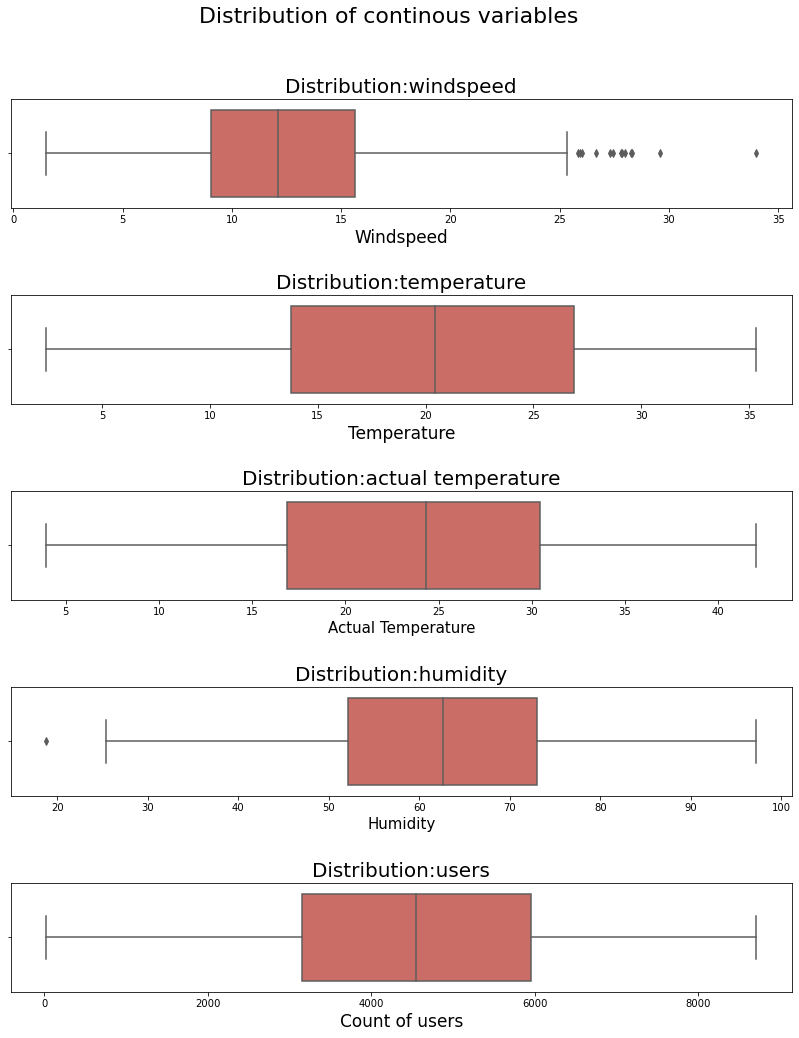

Skewness of windspeed is: 0.6762146231343967
Skewness of humidity is: 0.0352431671082305
Skewness of temperature_felt is: -0.13183568459946096
Skewness of temperature_actual is: -0.0551996868619147
Skewness of count_rental_bikes is: -0.04735278011900183

Observations:
windspeed and humidity has outliers in their values. We would provide suitable treatment later in the study
windspeed and humidity are marginally  positively skewed whereas other variables are marginally negatively skewed


In [109]:
#Plotting the continous variables to understand the distribution and descriptive stats.
def plot_countinous_variables():
    plt.figure(figsize=(14,16))

    plt.suptitle('Distribution of continous variables', fontsize=22)
    plt.subplot(511)
    g = sns.boxplot( x='windspeed', data=df_bike_sharing,palette="hls")
    g.set_xlabel("Windspeed", fontsize=17)
    g.set_title("Distribution:windspeed", fontsize=20)

    plt.subplot(512)
    g1 = sns.boxplot( x="temperature_actual",data=df_bike_sharing, palette = "hls")
    g1.set_xlabel("Temperature", fontsize=17)
    g1.set_title("Distribution:temperature", fontsize=20)

    plt.subplot(513)
    g2 = sns.boxplot(x="temperature_felt", data=df_bike_sharing,palette="hls")
    g2.set_xlabel("Actual Temperature", fontsize=15)
    g2.set_title("Distribution:actual temperature", fontsize=20)

    plt.subplot(514)
    g3 = sns.boxplot(x="humidity", data=df_bike_sharing,palette="hls")
    g3.set_xlabel("Humidity", fontsize=15)
    g3.set_title("Distribution:humidity", fontsize=20)

    plt.subplot(515)
    g4 = sns.boxplot( x='count_rental_bikes', data=df_bike_sharing,palette="hls")
    g4.set_xlabel("Count of users", fontsize=17)
    g4.set_title("Distribution:users", fontsize=20)



    plt.subplots_adjust(hspace = 0.8,top = 0.9)

    plt.show()
plot_countinous_variables()

print('Skewness of windspeed is:',df_bike_sharing['windspeed'].skew())
print('Skewness of humidity is:',df_bike_sharing['humidity'].skew())
print('Skewness of temperature_felt is:',df_bike_sharing['temperature_felt'].skew())
print('Skewness of temperature_actual is:',df_bike_sharing['temperature_actual'].skew())
print('Skewness of count_rental_bikes is:',df_bike_sharing['count_rental_bikes'].skew())
print()
print('Observations:')
print('windspeed and humidity has outliers in their values. We would provide suitable treatment later in the study')
print('windspeed and humidity are marginally  positively skewed whereas other variables are marginally negatively skewed')

### 4.1.2 Box plot to visualize the distribution of target variable w.r.t categorical variables

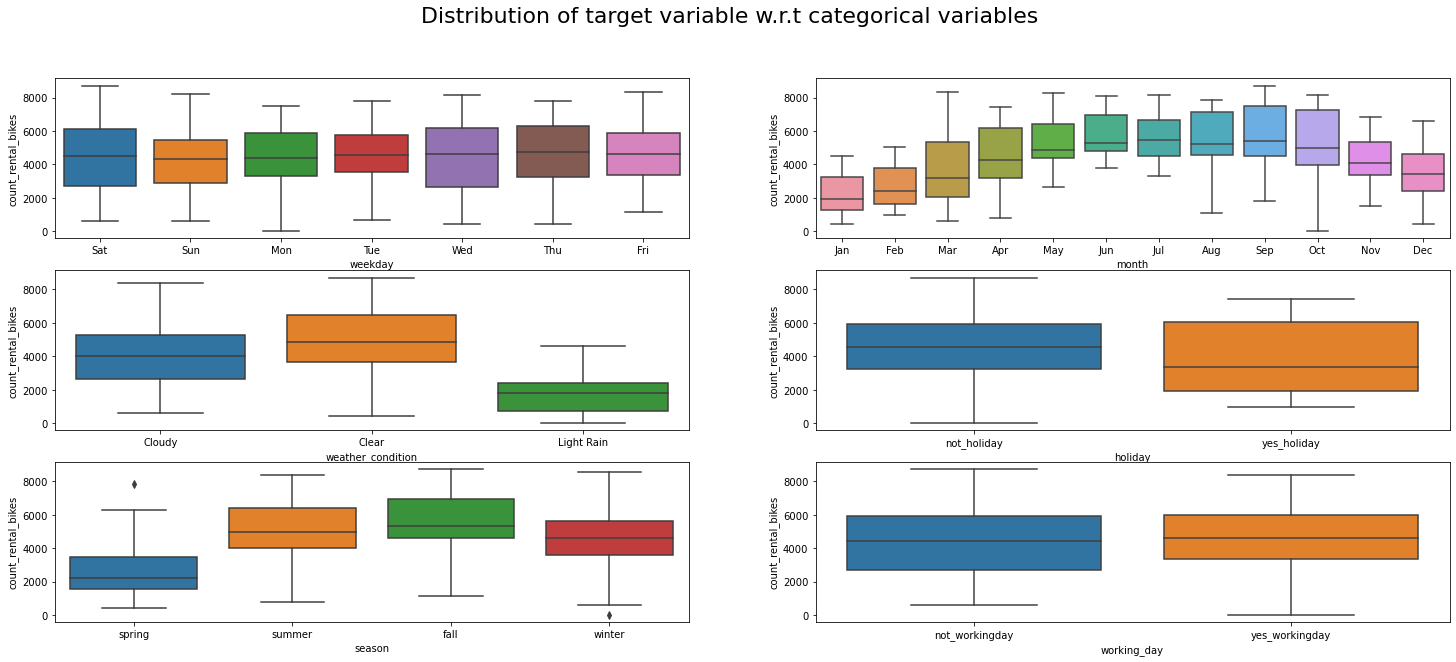

Findings:

weekday:
weekday variable shows very close trend having 13.5%-14.8% of total booking on all days of the week;
having their independent medians between 4000 to 5000 bookings.
This variable can have some or no influence towards the predictor.
I will let the model decide if this needs to be added or not.

month:
Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9
with a median of over 4000 booking per month. This indicates,month has some
trend for bookings and can be a good predictor for the dependent variable.

weather_condition:
Almost 67% of the bike booking were happening during weathers_condition is clean with
a median of close to 5000 booking (for the period of 2 years).Cloudy weather_condition with
30% of total booking.This indicates, weather_condition does show some trend
towards the bike bookings can be a good predictor for the dependent variable.

holiday:
Almost 97% of the bike booking were happening when it is not a holiday
which means this data 

In [110]:
# Plotting boxplots of all categorical variables W.r.t the target variable 'count_rental_bikes' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.suptitle('Distribution of target variable w.r.t categorical variables', fontsize=22)
plt.subplot(3,2,1)
sns.boxplot(x = 'weekday', y = 'count_rental_bikes',  data = df_bike_sharing)
plt.subplot(3,2,2)
sns.boxplot(x = 'month', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,3)
sns.boxplot(x = 'weather_condition', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,5)
sns.boxplot(x = 'season', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,6)
sns.boxplot(x = 'working_day', y = 'count_rental_bikes', data = df_bike_sharing)
plt.show()

print('Findings:')
print()
print('weekday:')
print('weekday variable shows very close trend having 13.5%-14.8% of total booking on all days of the week;\nhaving their independent medians between 4000 to 5000 bookings.\nThis variable can have some or no influence towards the predictor.\nI will let the model decide if this needs to be added or not.')
print()
print('month:')
print('Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9\nwith a median of over 4000 booking per month. This indicates,month has some\ntrend for bookings and can be a good predictor for the dependent variable.')    
print()      
print('weather_condition:')
print('Almost 67% of the bike booking were happening during weathers_condition is clean with\na median of close to 5000 booking (for the period of 2 years).Cloudy weather_condition with\n30% of total booking.This indicates, weather_condition does show some trend\ntowards the bike bookings can be a good predictor for the dependent variable.')
print()
print('holiday:')
print('Almost 97% of the bike booking were happening when it is not a holiday\nwhich means this data is clearly biased.This indicates, holiday cannot be a\ngood predictor for the dependent variable.')
print()
print('season:')
print('Almost 30% of the bike booking were happening in season3 with \na median of over 5000 booking (for the period of 2 years)')
print('This was followed by season2 & season4 with 28% & 25% of total booking.\nThis indicates, season can be a good predictor for the dependent variable') 
print()
print('working_day:')
print('Almost 70% of the bike booking were happening in ‘workingday’ with a median of close to\n5000 booking (for the period of 2 years).This indicates, working_day can be a\ngood predictor for the dependent variable')

### 4.1.3 bar plot to visualize the mean/day for rental bike's demand w.r.t year:2018,2019

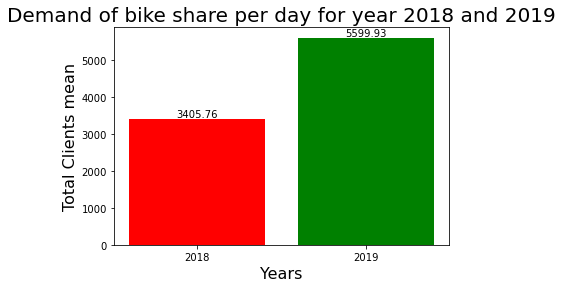

Observation:
There was 64.43 % rise in demand of bike share in year 2019 compared to yesr 2018.
which can be a sign of increasing popularity of the brand.


In [111]:
y=df_bike_sharing.groupby("year")['count_rental_bikes'].mean()
x=df_bike_sharing.groupby("year")['count_rental_bikes'].mean().index
chart=plt.bar(x,y,color=['Red','green'])
xticks=[0,1]
plt.xticks(xticks,['2018','2019'])
plt.title("Demand of bike share per day for year 2018 and 2019",fontdict={'fontsize':20})
plt.xlabel("Years",fontdict={'fontsize':16})
plt.ylabel("Total Clients mean",fontdict={'fontsize':16})
for rect in chart:
    plt.annotate(round(rect.get_height(),2),
                 xy=(rect.get_x()+rect.get_width()/2,rect.get_height())
                 ,textcoords='data'
                ,va='bottom'
                ,ha='center')
plt.show()

rise_in_demand=round(((5599.93-3405.76)/3405.76)*100,2)

print('Observation:')
print('There was',rise_in_demand,'% rise in demand of bike share in year 2019 compared to yesr 2018.')
print('which can be a sign of increasing popularity of the brand.')

### 4.1.4 Bar plot to visualize demand in rental bikes with respect to month and years

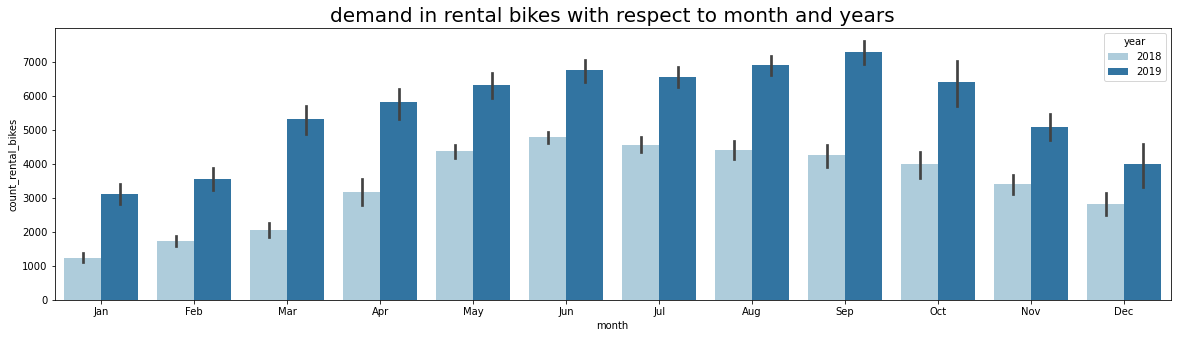

Observation:
Demand of rental bikes peaks from month of march and stay till october.
Year 2018 and 2019 shows similar demand trend.
Demand of bike share has been higher in all months of 2019 compared to 2018.


In [112]:
plt.figure(figsize=(20,5))
plt.title("demand in rental bikes with respect to month and years",fontdict={'fontsize':20})
sns.barplot('month','count_rental_bikes',hue='year',data=df_bike_sharing,palette='Paired')
plt.show()
print('Observation:')
print('Demand of rental bikes peaks from month of march and stay till october.')
print('Year 2018 and 2019 shows similar demand trend.')
print('Demand of bike share has been higher in all months of 2019 compared to 2018.')

### 4.1.5 Lineplot to visualize the demand in rental bikes with respect to month and weather condition

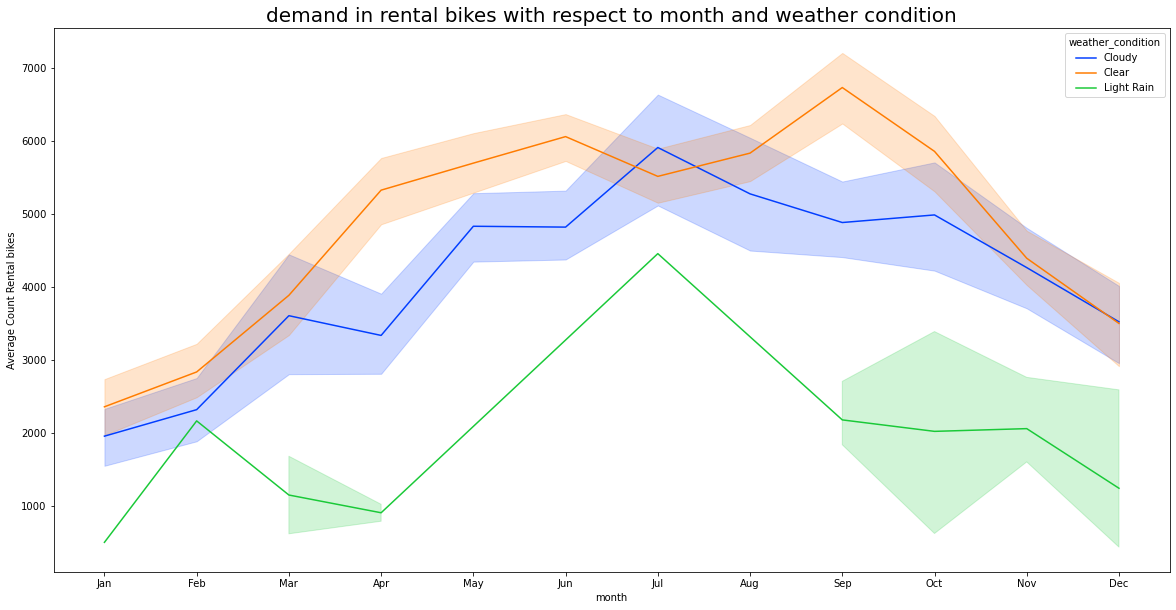

Observation:
Demand of bike share has been higher in clear weather condition in all months but month
july has shown higher demand in cloudy weather.
we suspect higher temperature and low humidity has been the reason for higher demand in 
cloudy weather condition in month of july.It would be interesting to view in terms of
temperature and humidity.
Its quite palpable that light rain or worse is bad for the business as there has been low
demand in comparison to other weather conditions.


In [113]:
plt.figure(figsize = (20,10))
plt.title("demand in rental bikes with respect to month and weather condition",fontdict={'fontsize':20})
sns.lineplot(x = 'month', y = 'count_rental_bikes', data = df_bike_sharing, estimator = np.average, hue = 'weather_condition', palette = 'bright')
plt.ylabel('Average Count Rental bikes')
plt.show()

print('Observation:')
print('Demand of bike share has been higher in clear weather condition in all months but month\njuly has shown higher demand in cloudy weather.')
print('we suspect higher temperature and low humidity has been the reason for higher demand in \ncloudy weather condition in month of july.It would be interesting to view in terms of\ntemperature and humidity.')
print('Its quite palpable that light rain or worse is bad for the business as there has been low\ndemand in comparison to other weather conditions.')

### 4.1.6 Line plot to visualize demand in rental bikes with respect to season and weather condition

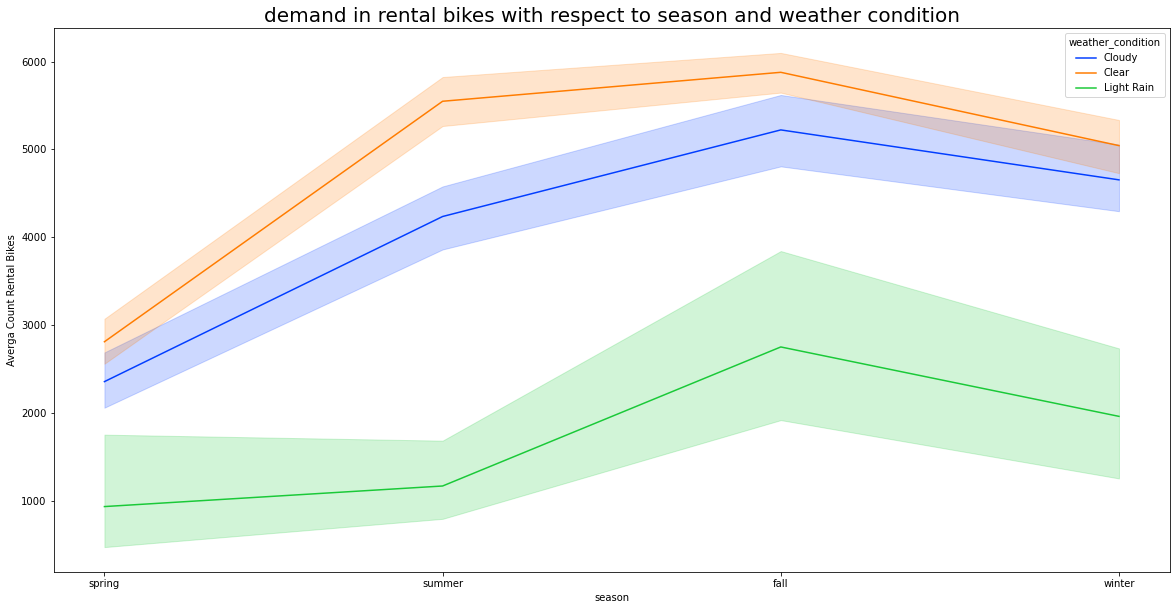

Observation:
demand for rental bikes are higher in Fall in all weather condition
Demand for rental bikes are lowest in Weather spring
Weather and season can be good predicter for demand in rental bikes


In [114]:
plt.figure(figsize = (20,10))
plt.title("demand in rental bikes with respect to season and weather condition",fontdict={'fontsize':20})
sns.lineplot(x = 'season', y = 'count_rental_bikes', data = df_bike_sharing, estimator = np.average, hue = 'weather_condition', palette = 'bright')
plt.ylabel('Averga Count Rental Bikes')
plt.show()

print('Observation:')
print('demand for rental bikes are higher in Fall in all weather condition')
print('Demand for rental bikes are lowest in Weather spring')
print('Weather and season can be good predicter for demand in rental bikes')

### 4.1.7 line plot to visualize demand in rental bikes with respect to weather condition and working day

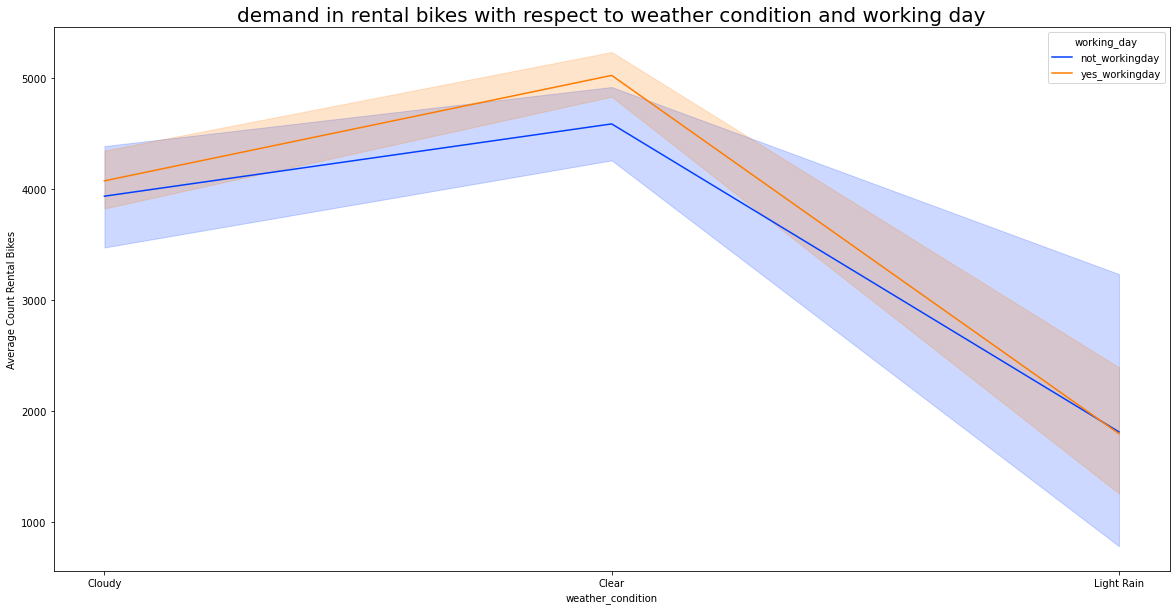

Observation:
demand are genrally higher during working days but it falls during light rain
demand for bikes increases during non working day with light rain
working days seems to be good predicter for demand in rental bikes


In [115]:
plt.figure(figsize = (20,10))
plt.title("demand in rental bikes with respect to weather condition and working day",fontdict={'fontsize':20})
sns.lineplot(x = 'weather_condition', y = 'count_rental_bikes', data = df_bike_sharing, 
             estimator = np.average, hue = 'working_day', palette = 'bright')
plt.ylabel('Average Count Rental Bikes')
plt.show()

print('Observation:')
print('demand are genrally higher during working days but it falls during light rain')
print('demand for bikes increases during non working day with light rain')
print('working days seems to be good predicter for demand in rental bikes')

### 4.1.8 line plot to visualize demand in rental bikes with respect to season and holiday

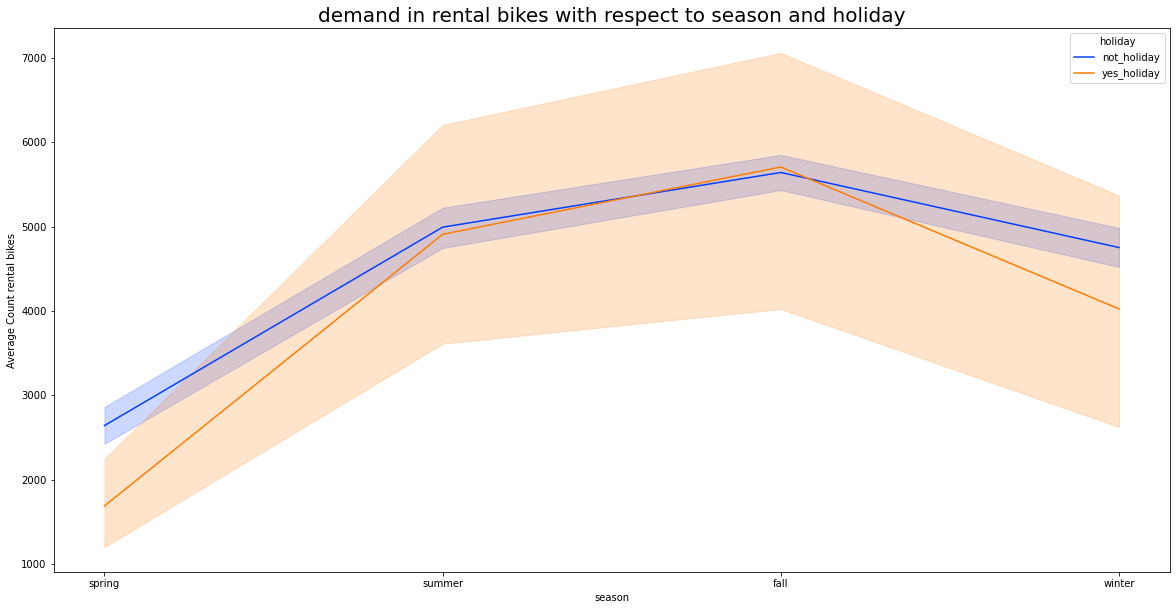

Observation:
Demand in rental bikes are higher during non holidays but surprisngly lesser than holidays during fall season
hence,holiday can be good predictor for demand in rental bikes 


In [116]:
plt.figure(figsize = (20,10))
plt.title("demand in rental bikes with respect to season and holiday",fontdict={'fontsize':20})
sns.lineplot(x = 'season', y = 'count_rental_bikes', data = df_bike_sharing, estimator = np.average, hue = 'holiday', palette = 'bright')
plt.ylabel('Average Count rental bikes')
plt.show()

print('Observation:')
print('Demand in rental bikes are higher during non holidays but surprisngly lesser than holidays during fall season')
print('hence,holiday can be good predictor for demand in rental bikes ')

### 4.1.9 Point plot to visualize demand in rental bikes with respect to working_day and week day

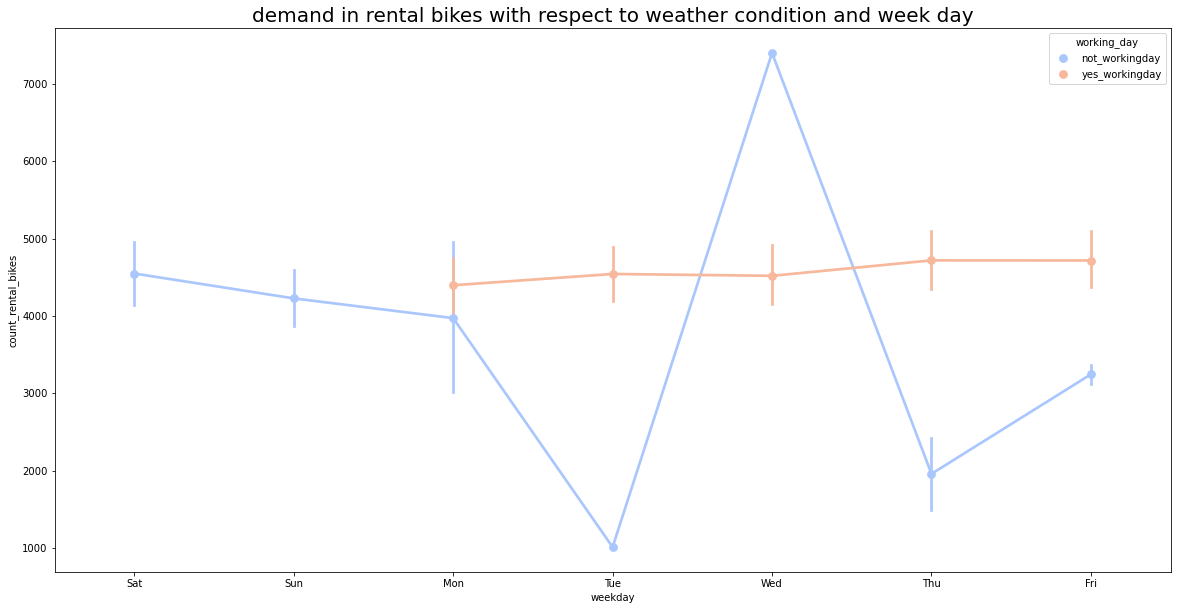

Observation:
Demand for rental bikes are quite similar for weekdays if it working day
Demand for rental bikes highest during wednesday if it is not working day
there is no demand for rental bikes during weekends ,if it is working day
weekdays does not seems to be a good predicter of demand in rental bikes if there it is working day
weekday does seems to be a good predicter of demand in rental bikes if it is non working day.
Weekday was not a good predictor(refer plot 4.1.2) but we can see the combine effect of weekday and working_day
we will create new varibale with combination of weekday and working_day


In [117]:
plt.figure(figsize = (20,10))
plt.title("demand in rental bikes with respect to weather condition and week day",fontdict={'fontsize':20})
sns.pointplot(x = 'weekday', y = 'count_rental_bikes', data = df_bike_sharing, estimator=np.average, 
              hue = 'working_day', palette='coolwarm')
plt.show()
print('Observation:')
print('Demand for rental bikes are quite similar for weekdays if it working day')
print('Demand for rental bikes highest during wednesday if it is not working day')
print('there is no demand for rental bikes during weekends ,if it is working day')
print('weekdays does not seems to be a good predicter of demand in rental bikes if there it is working day')
print('weekday does seems to be a good predicter of demand in rental bikes if it is non working day.')
print('Weekday was not a good predictor(refer plot 4.1.2) but we can see the combine effect of weekday and working_day')
print('we will create new varibale with combination of weekday and working_day')
      

### 4.1.10 Pair-plot to visualize the linear relationship of predictors with target variable

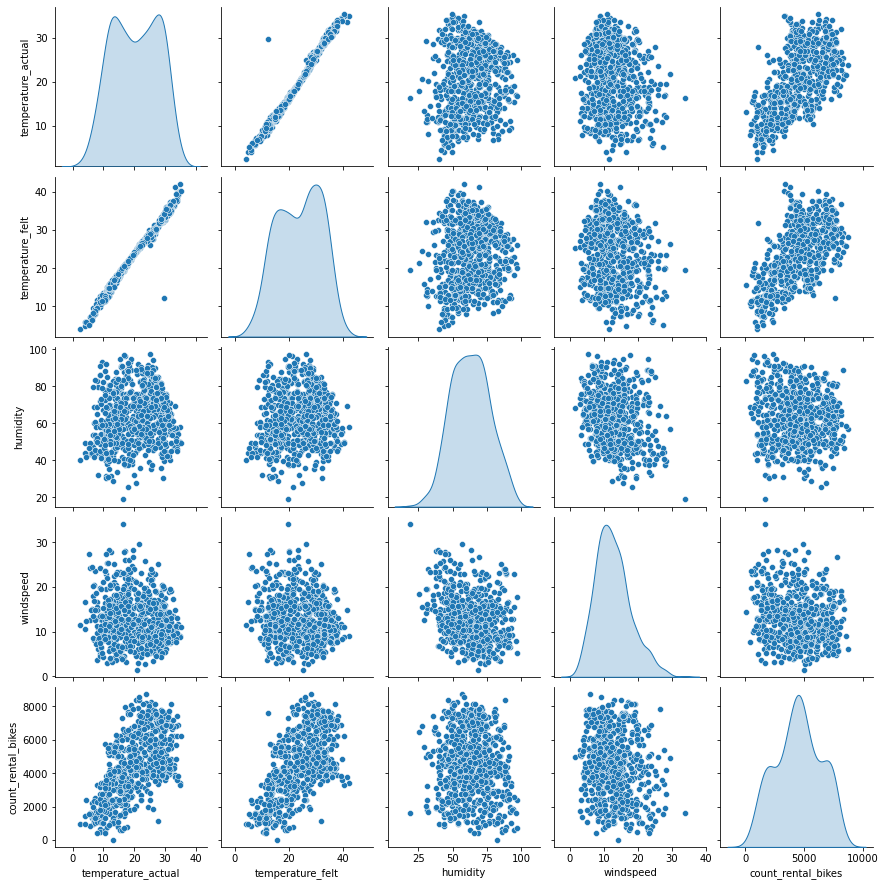


Observation:
temperature_felt and temperature_actual showing a linear relationship with target variable:count_bike_rentals
windspeed and humidity showing a non linear relationship with target variable.
Appropriate transformation will be applied to make it linear,if the are selected by the Feature selection process


In [118]:
# Create a new dataframe of only continous variables:

bike_cont_features=df_bike_sharing[[ 'temperature_actual','temperature_felt', 'humidity', 'windspeed','count_rental_bikes']]
sns.pairplot(bike_cont_features, diag_kind='kde')

plt.show()

print()
print('Observation:')
print('temperature_felt and temperature_actual showing a linear relationship with target variable:count_bike_rentals')
print('windspeed and humidity showing a non linear relationship with target variable.\nAppropriate transformation will be applied to make it linear,if the are selected by the Feature selection process')


### 4.1.11 Heat map to visualize the correlation among continous variables

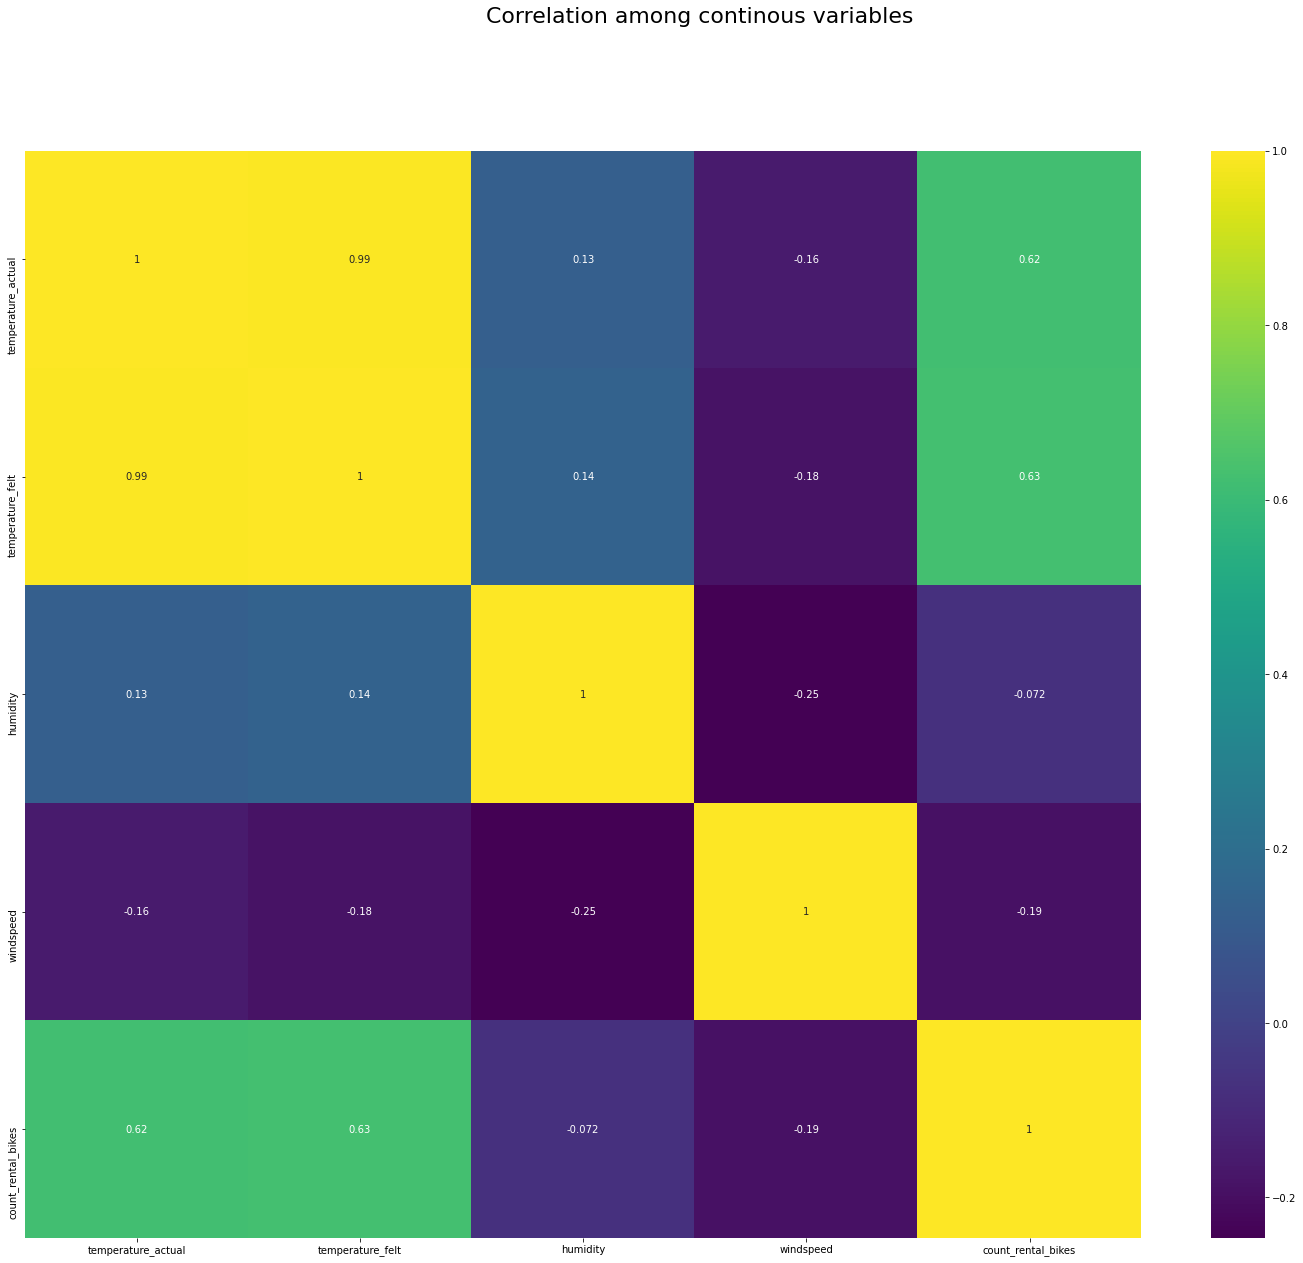


Observations:
temperature_felt and temperature_actual showing a moderate positive relationship
with target variable(correlation value:0.63 and 0.62 respectively.
temperatue_felt and temperature_actual are strongly correlated with each other.
temperature_actual will be dropped for its high correlation with temperature_felt
and comparatively lower correlation with target varibale compared to temperature_felt
windspeed and humidity showing a weak negative and positive relationship respectively with target variable.


In [119]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = (25,20))
plt.suptitle('Correlation among continous variables', fontsize=22)
sns.heatmap(bike_cont_features.corr(), annot = True, cmap="viridis")
plt.show()

print()
print('Observations:')
print('temperature_felt and temperature_actual showing a moderate positive relationship\nwith target variable(correlation value:0.63 and 0.62 respectively.')
print('temperatue_felt and temperature_actual are strongly correlated with each other.')
print('temperature_actual will be dropped for its high correlation with temperature_felt\nand comparatively lower correlation with target varibale compared to temperature_felt')
print('windspeed and humidity showing a weak negative and positive relationship respectively with target variable.')


### 4.1.12 boxplot to visualize the distribution of the continous variables after treating the outliers

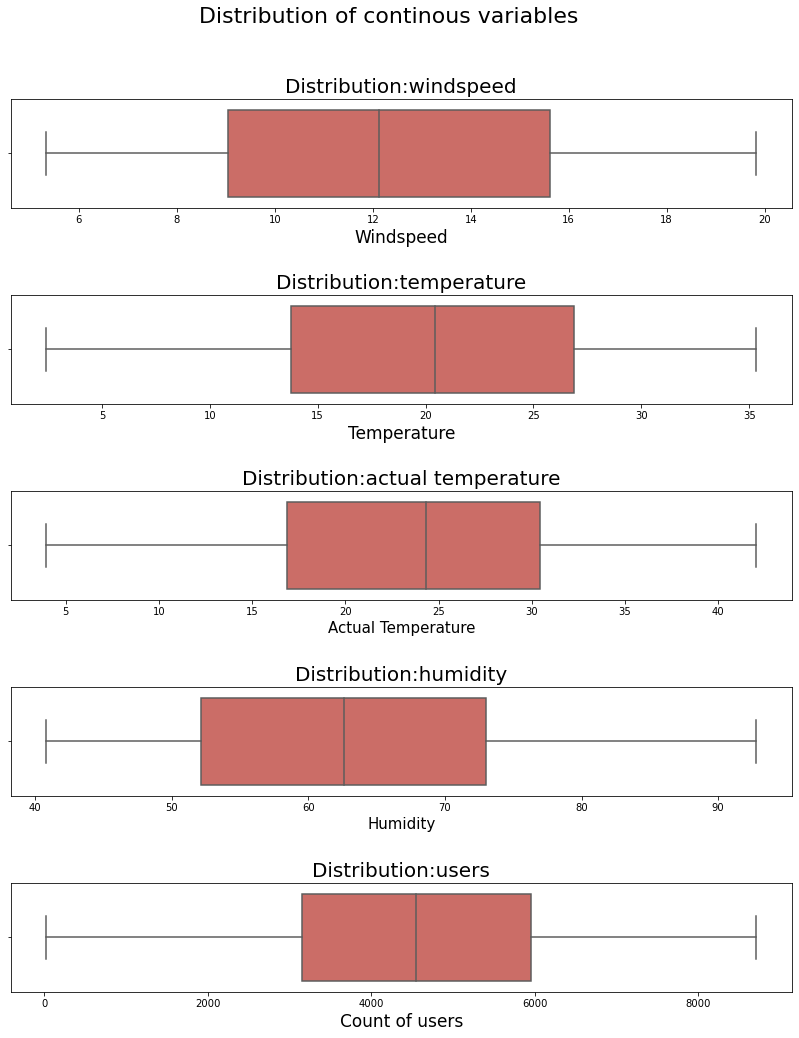


Skewness of windspeed is: 0.18201788988006706
Skewness of humidity is: 0.19784261160429867
Skewness of temperature_felt is: -0.13183568459946096
Skewness of temperature_actual is: -0.0551996868619147
Skewness of count_rental_bikes is: -0.04735278011900183

Insight
We have successfully managed the outliers by keeping the distribution of windspeed within
quantile range of 0.05 and 0.90.
Outliers with humidity has been contained within quantile range of 0.05 and 0.99.
Quantile range was selected in view with keeping the skewness close to zero.


In [120]:
#fixing the quantile range for distribution of variable with outliers(windspeed,humidity)
Lower_windspeed=df_bike_sharing['windspeed'].quantile(0.05)
High_windspeed=df_bike_sharing['windspeed'].quantile(0.90)
Lower_humidity=df_bike_sharing['humidity'].quantile(0.05)
High_humidity=df_bike_sharing['humidity'].quantile(0.99)

#Outliers being imputed with upper and lower quantiles.
df_bike_sharing['windspeed'] = np.where(df_bike_sharing['windspeed'] <Lower_windspeed, Lower_windspeed,df_bike_sharing['windspeed'])
df_bike_sharing['windspeed'] =np.where(df_bike_sharing['windspeed'] >High_windspeed, High_windspeed,df_bike_sharing['windspeed'])
df_bike_sharing['humidity'] = np.where(df_bike_sharing['humidity']<Lower_humidity, Lower_humidity,df_bike_sharing['humidity'])
df_bike_sharing['humidity'] = np.where(df_bike_sharing['humidity']>High_humidity, High_humidity,df_bike_sharing['humidity'])

#Visualize the presence of the outliers.
plot_countinous_variables()
print()
print('Skewness of windspeed is:',df_bike_sharing['windspeed'].skew())
print('Skewness of humidity is:',df_bike_sharing['humidity'].skew())
print('Skewness of temperature_felt is:',df_bike_sharing['temperature_felt'].skew())
print('Skewness of temperature_actual is:',df_bike_sharing['temperature_actual'].skew())
print('Skewness of count_rental_bikes is:',df_bike_sharing['count_rental_bikes'].skew())
print()
print('Insight')
print('We have successfully managed the outliers by keeping the distribution of windspeed within\nquantile range of 0.05 and 0.90.')
print('Outliers with humidity has been contained within quantile range of 0.05 and 0.99.')
print('Quantile range was selected in view with keeping the skewness close to zero.')


In [121]:
#temperature_actual and temperature_felt have very high correlation of 0.99. hence, temperature_actual will be dropped
df_bike_sharing.drop(['temperature_actual'],axis=1,inplace=True)

### 4.1.13 creating a new variable.
Initial analysis show that weekday does not show much difference in demand for rental bikes 
but when combined with workind day,then it seems to be significant.Hence we combine both varibale to create
a new varibale:df_bike_sharing['weekday_work']

In [122]:
#Creating a new variable
df_bike_sharing['weekday_work']=df_bike_sharing['weekday']+['_']+df_bike_sharing['working_day']
#dropping the peers used for creating new variable.
df_bike_sharing.drop(['weekday','working_day'],axis=1,inplace=True)

# 4.2 One-hot encoding with get_dummies with parameter drop_first=True

In [123]:
# Creating Dummy variable for categorical and numerical variables.
df_bike_sharing_dummies = pd.get_dummies(df_bike_sharing, drop_first=True)
df_bike_sharing_dummies.head()

,temperature_felt,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Fri_yes_workingday,weekday_work_Mon_not_workingday,weekday_work_Mon_yes_workingday,weekday_work_Sat_not_workingday,weekday_work_Sun_not_workingday,weekday_work_Thu_not_workingday,weekday_work_Thu_yes_workingday,weekday_work_Tue_not_workingday,weekday_work_Tue_yes_workingday,weekday_work_Wed_not_workingday,weekday_work_Wed_yes_workingday
0,18.18,80.58,10.75,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,17.69,69.61,16.65,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,9.47,43.73,16.64,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,10.61,59.04,10.74,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,11.46,43.70,12.52,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [124]:
#Splitting the dataset into Test and Train
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
#printing the shape of the train and test datasets.
np.random.seed(0)
df_train,df_test= train_test_split(df_bike_sharing_dummies,train_size = 0.70, random_state = 0)
print("df_train ",df_train.shape)
print("df_test ",df_test.shape)


df_train  (511, 33)
df_test  (220, 33)


## 4.3 RESCALING THE FEATURES

In [125]:
df_train.head()

,temperature_felt,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Fri_yes_workingday,weekday_work_Mon_not_workingday,weekday_work_Mon_yes_workingday,weekday_work_Sat_not_workingday,weekday_work_Sun_not_workingday,weekday_work_Thu_not_workingday,weekday_work_Thu_yes_workingday,weekday_work_Tue_not_workingday,weekday_work_Tue_yes_workingday,weekday_work_Wed_not_workingday,weekday_work_Wed_yes_workingday
524,32.42,43.71,9.67,7736,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12,7.54,47.04,19.83,1406,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
161,33.90,65.46,10.37,4966,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
556,32.51,63.33,10.17,6290,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
502,27.56,52.33,9.17,7384,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [126]:
#Creating an instance : scaler for MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler to all the continous variables
num_feats=[ 'temperature_felt','humidity','windspeed','count_rental_bikes']
df_train[num_feats]= scaler.fit_transform(df_train[num_feats])
df_train.head()

,temperature_felt,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Fri_yes_workingday,weekday_work_Mon_not_workingday,weekday_work_Mon_yes_workingday,weekday_work_Sat_not_workingday,weekday_work_Sun_not_workingday,weekday_work_Thu_not_workingday,weekday_work_Thu_yes_workingday,weekday_work_Tue_not_workingday,weekday_work_Tue_yes_workingday,weekday_work_Wed_not_workingday,weekday_work_Wed_yes_workingday
524,0.755360,0.055877,0.299069,0.904020,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12,0.071468,0.119929,1.000000,0.162194,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
161,0.796042,0.474235,0.347361,0.579398,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
556,0.757834,0.433265,0.333563,0.734560,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
502,0.621770,0.221682,0.264574,0.862768,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [127]:
#Splitting the train dataset into Explanatory variables: X_train and Target variable: y_train
y_train=df_train.pop('count_rental_bikes')
X_train=df_train

# Section5: Building model and Feature Selection

## 5.1 Model 1: Model with all scaled and encoded variables

In [128]:
#Importing statsmodels
import statsmodels.api as sm

# Add a constant
X_train_all_variables = sm.add_constant(X_train)

# Create a first fitted model
Model_1 = sm.OLS(y_train, X_train_all_variables).fit()

#View the summary of the regression
print(Model_1.summary())
print()
print('observation:')
print('High R-square and adjusted R-Square value of 0.820 and 0.812')
print('high number of variables are insignificant with p-value more than 0.05')
print('Model will be created again after feature selection.')

                            OLS Regression Results                            
Dep. Variable:     count_rental_bikes   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     79.15
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.18e-165
Time:                        23:21:28   Log-Likelihood:                 499.91
No. Observations:                 511   AIC:                            -937.8
Df Residuals:                     480   BIC:                            -806.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## 5.2 Feature Selection  

# Recursive Feature Elimination
Recursive Feature Elimination, or RFE for short, is a feature selection algorithm.
RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [129]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [130]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm,n_features_to_select=11,step=15)             
rfe = rfe.fit(X_train, y_train)

In [131]:
#creating a list names of variables,rfe support status and respecting ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temperature_felt', True, 1),
 ('humidity', True, 1),
 ('windspeed', False, 2),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 3),
 ('month_Dec', False, 2),
 ('month_Feb', False, 3),
 ('month_Jan', False, 3),
 ('month_Jul', False, 2),
 ('month_Jun', False, 3),
 ('month_Mar', True, 1),
 ('month_May', False, 2),
 ('month_Nov', True, 1),
 ('month_Oct', False, 3),
 ('month_Sep', True, 1),
 ('holiday_yes_holiday', False, 3),
 ('weather_condition_Cloudy', True, 1),
 ('weather_condition_Light Rain', True, 1),
 ('weekday_work_Fri_yes_workingday', False, 3),
 ('weekday_work_Mon_not_workingday', False, 3),
 ('weekday_work_Mon_yes_workingday', False, 3),
 ('weekday_work_Sat_not_workingday', False, 3),
 ('weekday_work_Sun_not_workingday', False, 3),
 ('weekday_work_Thu_not_workingday', True, 1),
 ('weekday_work_Thu_yes_workingday', False, 2),
 ('weekday_work_Tue_not_workingday', False, 3),
 ('weekday_work_Tue

In [132]:
#creating instance for a index with all variable with rfe.support_ value as True.
col = X_train.columns[rfe.support_]
col

Index(['temperature_felt', 'humidity', 'season_spring', 'season_winter',
       'year_2019', 'month_Mar', 'month_Nov', 'month_Sep',
       'weather_condition_Cloudy', 'weather_condition_Light Rain',
       'weekday_work_Thu_not_workingday'],
      dtype='object')

In [133]:
#Viewing  variables with rfe.support_ value as False.
X_train.columns[~rfe.support_]

Index(['windspeed', 'season_summer', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_May', 'month_Oct',
       'holiday_yes_holiday', 'weekday_work_Fri_yes_workingday',
       'weekday_work_Mon_not_workingday', 'weekday_work_Mon_yes_workingday',
       'weekday_work_Sat_not_workingday', 'weekday_work_Sun_not_workingday',
       'weekday_work_Thu_yes_workingday', 'weekday_work_Tue_not_workingday',
       'weekday_work_Tue_yes_workingday', 'weekday_work_Wed_not_workingday',
       'weekday_work_Wed_yes_workingday'],
      dtype='object')

In [134]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Section6: Building the multiple regression model with selected features

### VIF Check
We will checking the variance inflation factor before building the model.If the value of the VIF>=5.0 ,
then we will drop the respective variables. Once the VIF of all the remaining variables are less than 5.0, 
then we would check the significance of the individual variable. if the p-value of all remaining variables in 
the model is less than or equal to 0.05, then we have strong evidence to reject the null hyphothesis.We will 
also check the overall fit of the model by examining the F-statistic value and also look at at prob(f) is less than 0.05.


## 6.1 Model 2

In [135]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,humidity,5.78
0,temperature_felt,4.00
3,season_winter,2.09
4,year_2019,2.07
8,weather_condition_Cloudy,2.03
6,month_Nov,1.63
2,season_spring,1.44
9,weather_condition_Light Rain,1.24
5,month_Mar,1.22
7,month_Sep,1.18


In [136]:
# Add a constant
X_train_model_2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model_2 = sm.OLS(y_train, X_train_model_2).fit()

# Print a summary of the linear regression model obtained
print(model_2.summary())
print('observation')
print('feature humidity is insignificant as its p-value is 0.196, higher than 0.05')
print('We will drop faeture humidity and build new model')

                            OLS Regression Results                            
Dep. Variable:     count_rental_bikes   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.32e-177
Time:                        23:21:33   Log-Likelihood:                 481.02
No. Observations:                 511   AIC:                            -938.0
Df Residuals:                     499   BIC:                            -887.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# 6.3: Model 3

In [137]:
#Removing insignificant variable
#Removing variable 'holiday_yes_holiday' as its p-value is more than 0.05 and VIF value is 5.78.
X_train_model_3 =X_train_rfe.drop(["humidity"], axis = 1)

### VIF Check

In [138]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_3.values, i) for i in range(X_train_model_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

print('Observation')
print('all variables in X_train_model_3 have VIF less than 5.0')

                          Features   VIF
0                 temperature_felt  2.17
3                        year_2019  2.04
2                    season_winter  1.90
5                        month_Nov  1.63
7         weather_condition_Cloudy  1.49
1                    season_spring  1.37
4                        month_Mar  1.21
6                        month_Sep  1.15
8     weather_condition_Light Rain  1.06
9  weekday_work_Thu_not_workingday  1.05
Observation
all variables in X_train_model_3 have VIF less than 5.0


In [139]:
# Add a constant
X_train_model_3 = sm.add_constant(X_train_model_3)

# Create a first fitted model
model_3 = sm.OLS(y_train, X_train_model_3).fit()

# Print a summary of the linear regression model obtained
print(model_3.summary())
print('We will go further with model_3 as variables included has very low VIF value as well as they seems significant.')
print('We will not consider model_1 and model_3 as they have variable with VIF more than 5.0 and some of the varibales\nwere insignificant')
print('Model is able to explain 81.8% of effect of predictors on target variable as Rsquare is:0.818')
print('A high F-Statistic value of 225.2 and prob(F-statistic ) less than 0.05 makes the overall fit of the model significant')

                            OLS Regression Results                            
Dep. Variable:     count_rental_bikes   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.96e-178
Time:                        23:21:35   Log-Likelihood:                 480.17
No. Observations:                 511   AIC:                            -938.3
Df Residuals:                     500   BIC:                            -891.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Section 7: Final Model Interpretation

## Hypothesis Testing:

Two common methods for this are:

1)By the use of p-values:
If the p-value of a variable is greater than a certain limit (usually 0.05), the variable is insignificant in the prediction of the target variable.

2)By checking the values of the regression coefficient:
If the value of the regression coefficient corresponding to a predictor is zero, then variable is insignificant in the prediction of the target variable and has no linear relationship with it.

We will go by first approach.

# 7.1 Hypothesis Formulation and Results


Null Hyphothesis- H0:β1=β1=...=βn=0 
Alternative Hyphothesis- H1:  at least one  βi!=0

Result:

All coefficiant in model_3 has non-zerovalues.Moreover they have p-value lower than 0.05.
Hence the variables in our model are significant.
Thus, if we reject the Null hypothesis, we can say that the coefficient β1,β2...βn is not equal to zero and hence, is significant for the model.

To check if the overall model fit is significant or not, the primary parameter to be looked is the F-statistic. the F-statistic is a measure that can determine whether the overall  fit of the model with all the coefficients is significant or not. 

the value of the F-statistic is high,  the Prob(F) is less than 0.05, and hence, we can conclude that the model is significant.


# 7.2 Regression model:model_3 coefficient values

In [140]:
model_3_coeff=pd.DataFrame(model_3.params,columns=['coefficient_values'])
model_3_coeff['coefficient_values']=round(model_3_coeff['coefficient_values'],4)
model_3_coeff

,coefficient_values
const,0.2216
temperature_felt,0.4399
season_spring,-0.1316
season_winter,0.0744
year_2019,0.2335
month_Mar,0.0449
month_Nov,-0.0390
month_Sep,0.0706
weather_condition_Cloudy,-0.0677
weather_condition_Light Rain,-0.2977


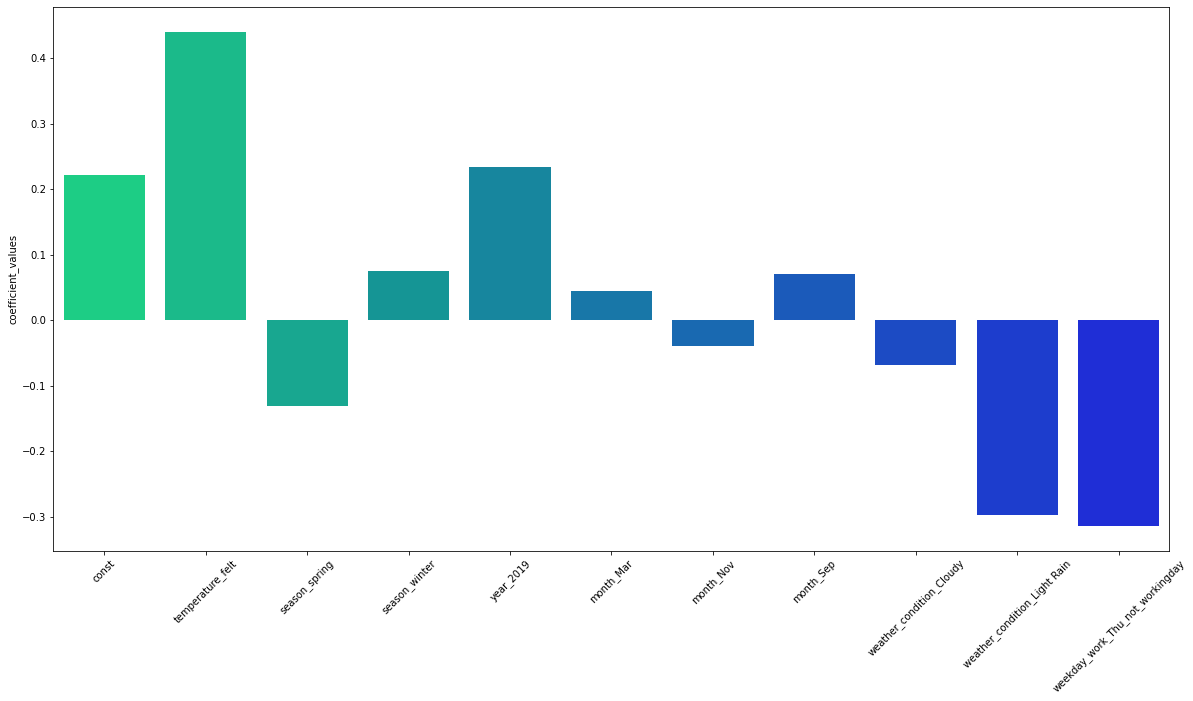

In [141]:
#viewing the effect of selected predictors in the final model:model_3
def plot_predictors_coeff():
    plt.figure(figsize = (20,10))
    sns.barplot(x = model_3_coeff.index, y = 'coefficient_values', data =model_3_coeff ,palette="winter_r")
    plt.xticks(rotation=45)
    plt.show()
plot_predictors_coeff()

# 7.3  Linear equation of  Regression model:model_3:

### count_rental_bikes = 0.2216 + (0.4399 * temperature_felt)  - (0.1316 * season_spring) + (0.0744 * season_winter) + (0.2335 * year_2019) + (0.0449 * month_Mar) - (0.0390 * month_Nov) + (0.0706 * month_Sep) + (0.0604 *  month_Sep) - (0.0667 * weather_condition_Cloudy) - (0.2977 *  weather_condition_Light_Rain)-(0.3140 * weekday_work_Thu_not_workingday)



  

## 7.4 Interpretation of Coefficients:
**Intercept**:The Constant value of ‘0.2216’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.2216 units.

**temperature_felt:** A coefficient value of ‘0.4399’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.4399 units.

**season_spring:** A coefficient value of ‘-0.1316’ indicated that a unit increase in season_spring variable, decreases the bike hire numbers by 0.1316 units.

**season_winter:** A coefficient value of ‘0.0744 ’ indicated that  a unit increase in season_winter variable increases the bike hire numbers by 0.0744  units.

**year:** A coefficient value of ‘0.2335’ indicated that a unit increase in year variable, increases the bike hire numbers by 0.2335 units.

**month_Mar:** A coefficient value of ‘0.0499’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.0499 units.

**month_Nov:** A coefficient value of ‘-0.0390’ indicated that, a unit increase in month_Nov variable decreases the bike hire numbers by 0.0390 units.

**month_Sep:** A coefficient value of ‘0.0706’ indicated that a unit increase in month_Sep variable increases the bike hire numbers by 0.0706 units.

**weather_condition_Cloudy:** A coefficient value of ‘-0.0667’ indicated that a unit increase in weather_condition_Cloudy variable decreases the bike hire numbers by 0.0667 units.

**weather_condition_Light_Rain:** A coefficient value of ‘-0.2977’ indicated that  a unit increase in weather_condition_Light_Rain variable decreases the bike hire numbers by 0.2977 units.

**weekday_work_thu_not_workingday:** A coefficient value of ‘-0.3140’ indicated that  a unit increase in weather_condition_Light_Rain variable decreases the bike hire numbers by 0.3140 units.



#  Section 8: Assumptions/Analysis of Residuals

# 8.1) Linearity
This assumes that there is a linear relationship between the predictors  and the response variable. This also assumes that the predictors are additive.

Issues: The predictions will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

How to detect it:  by using a scatter plot to see our predicted values versus the actual values. Ideally, the points should lie on or around a diagonal line on the scatter plot.



In [142]:
#creating an instance for model_3.
model=model_3
res = model_3.resid
y_train_pred=model_3.predict(X_train_model_3)
predicted=y_train_pred  


Assumption 1: Linear Relationship between the Target and the Features 



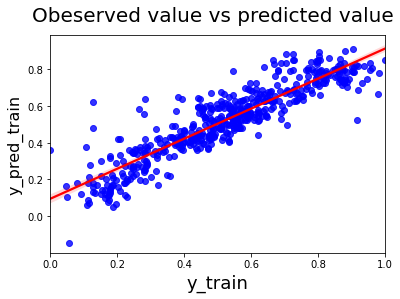


Observations:
regplot highlights a relatively linear relationship with observed and predicted value.
hence,Features have a linear relationship with target varibale:count-rental_bikes.
Assumption Satisfied.


In [143]:
def linear_assumption(model,predicted):
    
    print('Assumption 1: Linear Relationship between the Target and the Features', '\n')
    fig = plt.figure()
    sns.regplot(y_train,y_train_pred ,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    fig.suptitle('Obeserved value vs predicted value', fontsize = 20)              # Plot heading 
    plt.xlabel('y_train', fontsize = 18)                          # X-label
    plt.ylabel('y_pred_train', fontsize = 16) 
    plt.show()
    
linear_assumption(model,predicted)

print()
print('Observations:')
print('regplot highlights a relatively linear relationship with observed and predicted value.')
print('hence,Features have a linear relationship with target varibale:count-rental_bikes.')
print('Assumption Satisfied.')

# 8.2) Normality of the residuals
More specifically, this assumes that the residuals of the model are normally distributed.

Issues: A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

How to detect it: There are a variety of ways to do so, but we’ll look at both a histogram as well as Q-Q plot.



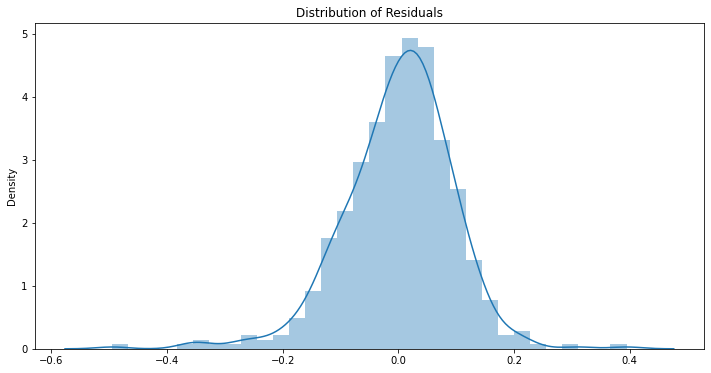


Observation:
distplot establish the assumption that residual are normally distributed
We would plot Q-Q to further strenthen evidence for our findings


In [144]:
def normal_residuals_assumption(model,res):
    
   
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(res)
    plt.show()
    
normal_residuals_assumption(model,res) 
print()
print('Observation:')
print('distplot establish the assumption that residual are normally distributed')
print('We would plot Q-Q to further strenthen evidence for our findings')


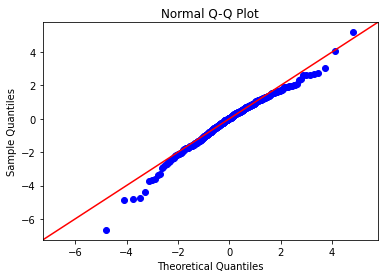


Observation:
Most of the points lie on the diagonal line with little deviation at start and end of the tails
We can safely assume the error terms are normally distributed
Assumption Satisfied


In [145]:
#Plotting Q-Q plots.

import scipy.stats as st
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.title("Normal Q-Q Plot")
plt.show()


print()
print('Observation:')
print('Most of the points lie on the diagonal line with little deviation at start and end of the tails')
print('We can safely assume the error terms are normally distributed')
print('Assumption Satisfied')

# 8.3) No Autocorrelation of the Error
This assumes no autocorrelation of the residuals. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

Issue: This will impact our model estimates.

How to detect it: We will perform a Durbin-Watson test to determine if either positive or negative correlation is present.

Hypothesis for Durbin-Watson Test:
Null hypothesis,H0:First order autocorrelation does not exist.
Alternative hypothesis.H1:First order autocorrelation exists.


In [146]:
def autocorrelation_assumption(model,res):
    
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 3: No Autocorrelation','\n')
    
    durbinWatson = durbin_watson(res)
    print('Value of Durbin-Watson test:', durbinWatson)
    print()
    print('Observation:')
    if durbinWatson < 1.5:
        print('we reject the null hypothesis')
        print('There is a positive autocorrelation')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('we reject the null hypothesis')
        print('there is Negative autocorrelation')
        print('Assumption not satisfied')
    else:
        print('we fail to reject the null hypothesis')
        print('there is Little to no autocorrelation')
        print('Assumption satisfied')
        
autocorrelation_assumption(model,res)

Assumption 3: No Autocorrelation 

Value of Durbin-Watson test: 1.9095304087780651

Observation:
we fail to reject the null hypothesis
there is Little to no autocorrelation
Assumption satisfied


# 8.4) Homoscedasticity
This assumes homoscedasticity, which is the constant variance within our residuals. 

Issues: if assumption not satisfied then Significance tests for coefficients will be biased due to the standard errors. Additionally, the confidence intervals will be either too wide or too narrow.

How to detect it: Plot the residuals and see if the variance appears to be uniform.



Assumption 4: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


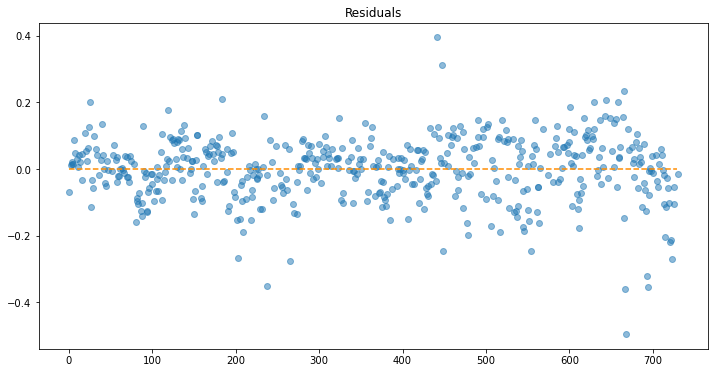

Residuals have fairly constant variation
Assumption Satisfied


In [147]:
def homoscedasticity_assumption(model,res):
    
    
    print('Assumption 4: Homoscedasticity of Error Terms', '\n')
    print('Residuals should have relative constant variance')
        

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    plt.scatter(x=res.index, y=res, alpha=0.5)
    plt.plot(np.repeat(0, res.index.max()), color='darkorange', linestyle='--')
    plt.title('Residuals')
    plt.show() 
    print('Residuals have fairly constant variation')
    print('Assumption Satisfied')
    

homoscedasticity_assumption(model,res)

# 8.5) There is No Multicollinearity between the predictor variables

In [148]:
def Assumption_No_Multicollinearity():
    # Check for the VIF values of the feature variables. 
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    #X_train_model_3.drop(['const'],axis=1,inplace=True)
    vif = pd.DataFrame()
    vif['Features'] = X_train_model_3.columns
    vif['VIF'] = [variance_inflation_factor(X_train_model_3.values, i) for i in range(X_train_model_3.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif.iloc[1:,:])
Assumption_No_Multicollinearity()
print()
print('Observation:')
print('There is low to no correlation within predictor variables')
print('Assumption satisfied')

                           Features   VIF
2                     season_spring  2.65
1                  temperature_felt  2.56
3                     season_winter  1.96
6                         month_Nov  1.55
5                         month_Mar  1.12
7                         month_Sep  1.06
9      weather_condition_Light Rain  1.05
10  weekday_work_Thu_not_workingday  1.05
8          weather_condition_Cloudy  1.04
4                         year_2019  1.02

Observation:
There is low to no correlation within predictor variables
Assumption satisfied


# Section 9: MAKING PREDICTION USING FINAL MODEL:model_3



### 9.1Applying the one hot encoding on the test sets and dropping first peer.

In [149]:
#encoding the categorical variables
df_test_dummies=pd.get_dummies(df_test,drop_first= True)
df_test_dummies.head()

,temperature_felt,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Fri_yes_workingday,weekday_work_Mon_not_workingday,weekday_work_Mon_yes_workingday,weekday_work_Sat_not_workingday,weekday_work_Sun_not_workingday,weekday_work_Thu_not_workingday,weekday_work_Thu_yes_workingday,weekday_work_Tue_not_workingday,weekday_work_Tue_yes_workingday,weekday_work_Wed_not_workingday,weekday_work_Wed_yes_workingday
196,31.91,58.50,13.960,5923,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
187,34.34,65.12,10.670,4592,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14,12.41,49.88,10.580,1248,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
31,11.73,82.96,5.335,1360,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
390,17.80,76.96,5.335,4075,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [150]:
# Scaling all the continous variables.
num_feats=[ 'temperature_felt','humidity','windspeed','count_rental_bikes']
df_test[num_feats]= scaler.transform(df_test_dummies[num_feats])
df_test.head()

,temperature_felt,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Fri_yes_workingday,weekday_work_Mon_not_workingday,weekday_work_Mon_yes_workingday,weekday_work_Sat_not_workingday,weekday_work_Sun_not_workingday,weekday_work_Thu_not_workingday,weekday_work_Thu_yes_workingday,weekday_work_Tue_not_workingday,weekday_work_Tue_yes_workingday,weekday_work_Wed_not_workingday,weekday_work_Wed_yes_workingday
196,0.741341,0.340360,0.595033,0.691550,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
187,0.808136,0.467695,0.368058,0.535568,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14,0.205333,0.174556,0.361849,0.143677,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
31,0.186641,0.810845,0.000000,0.156803,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
390,0.353491,0.695436,0.000000,0.474979,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [151]:
#Dividing test set into predictors and target variable.
y_test=df_test.pop('count_rental_bikes')
X_test=df_test

In [152]:
#Dropping contant from Train predictor set to make it as a reference to select predictors for test set.
X_train_4_test=X_train_model_3.drop(["const"],axis=1)
col_4_test=X_train_4_test.columns
X_test=X_test[col_4_test]
# Adding constant variable to test dataframe
X_test_model_3 = sm.add_constant(X_test)
X_test_model_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 196 to 235
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            220 non-null    float64
 1   temperature_felt                 220 non-null    float64
 2   season_spring                    220 non-null    uint8  
 3   season_winter                    220 non-null    uint8  
 4   year_2019                        220 non-null    uint8  
 5   month_Mar                        220 non-null    uint8  
 6   month_Nov                        220 non-null    uint8  
 7   month_Sep                        220 non-null    uint8  
 8   weather_condition_Cloudy         220 non-null    uint8  
 9   weather_condition_Light Rain     220 non-null    uint8  
 10  weekday_work_Thu_not_workingday  220 non-null    uint8  
dtypes: float64(2), uint8(9)
memory usage: 7.1 KB


In [153]:
#Predicting the values of observed target using selected regression model.
y_pred_test= model_3.predict(X_test_model_3)

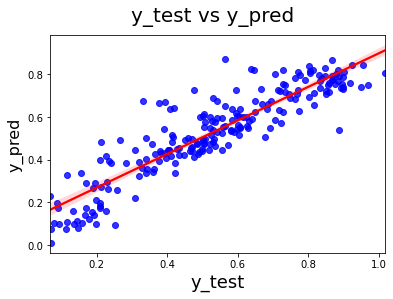

In [154]:
#Regplot to view the observed target value and predicted target value in test set.
fig = plt.figure()
sns.regplot(y_test, y_pred_test,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                       
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

# 9.2 R^2 Value for TEST

In [155]:
#Calculating and viewing the coefficient of determination for test set.
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_test)
print('Rsquare score for test dataset is:',r2)

Rsquare score for test dataset is: 0.8170714973134281


# 9.3Adjusted R^2 Value for TEST

In [156]:
# Get the shape of X_test
print('Shape of test predictors:',X_test.shape)
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Rsquare score for test dataset is:',adjusted_r2)

Shape of test predictors: (220, 10)
Rsquare score for test dataset is: 0.8083189373762716


# Section10: Model performace check
### 10.1Calculating and comparing the mean square error and root mean square error.

In [157]:
from sklearn.metrics import mean_squared_error
#printing the mse of train set and test set
print('MSE for train dataset:',mean_squared_error(y_train,y_train_pred))
print('MSE for test dataset:',mean_squared_error(y_test, y_pred_test))
#printing the rmse of train set and test set
print('RMSE for train dataset:',np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE for test dataset:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print()
print('Observation:')
print('predictiong for train and test set can be 9-10 percent off.')
print('Lower mse and rmse means better the model.')

MSE for train dataset: 0.008940171282568105
MSE for test dataset: 0.010368692846476261
RMSE for train dataset: 0.09455247898689967
MSE for test dataset: 0.10182677863153808

Observation:
predictiong for train and test set can be 9-10 percent off.
Lower mse and rmse means better the model.


# 10.2: Comparing rsquare value of train and test set

In [158]:
#printing the Rsquare value of train and test data set.
from sklearn.metrics import r2_score
print('Rsquare score for train dataset is:',r2_score(y_train,y_train_pred))
print('Rsquare score for test dataset is:',r2_score(y_test,y_pred_test))

print()
print('observation:')
print('Rsqaure values are very close for both data sets')
print('Overfitting and underfitting is not a concern for model:model_3')

Rsquare score for train dataset is: 0.8183418496896118
Rsquare score for test dataset is: 0.8170714973134281

observation:
Rsqaure values are very close for both data sets
Overfitting and underfitting is not a concern for model:model_3


# 10.3:Checking the accuracy of predicting ability of selected model:model_3

In [159]:
#importing libraries for Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build multiple linear regression model
model_cv = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model_cv, X_train_model_3, y_train, scoring='r2',
                         cv=cv, n_jobs=-1)
print("Accuracy for the model_3 with variation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('cross validation scores for model_3:',scores)
print()
print('observation:')
print('The accuracy is consistently high (high values with low standard deviation)')
print('which indicates that the model is working fine. This is definitely the best scenario of CV.')

Accuracy for the model_3 with variation: 0.80 (+/- 0.08)
cross validation scores for model_3: [0.74705162 0.79769769 0.81131728 0.79712977 0.8653001 ]

observation:
The accuracy is consistently high (high values with low standard deviation)
which indicates that the model is working fine. This is definitely the best scenario of CV.


# 10.4: Summary

In [160]:
print('Rsquare score for train dataset is:',r2_score(y_train,y_train_pred))
print('Rsquare score for test dataset is:',r2_score(y_test,y_pred_test))

print()
print('Rsqaure values are very close for both data sets')
print('Overfitting and underfitting is not a concern for model:model_3')
print()
print('MSE for train dataset:',mean_squared_error(y_train,y_train_pred))
print('MSE for test dataset:',mean_squared_error(y_test, y_pred_test))
#printing the rmse of train set and test set
print('RMSE for train dataset:',np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE for test dataset:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print()
print('predictiong for train and test set can be 9-10 percent off.')
print('Lower mse and rmse are better for the model.')
print('This seems to be a really good model that can very well Generalize.')
print()
print("Accuracy for the model_3 with variation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('cross validation scores for model_3:',scores)
print('The accuracy is consistently high (high values with low standard deviation)')
print('which indicates that the model is working fine. This is definitely the best scenario of CV.')

Rsquare score for train dataset is: 0.8183418496896118
Rsquare score for test dataset is: 0.8170714973134281

Rsqaure values are very close for both data sets
Overfitting and underfitting is not a concern for model:model_3

MSE for train dataset: 0.008940171282568105
MSE for test dataset: 0.010368692846476261
RMSE for train dataset: 0.09455247898689967
MSE for test dataset: 0.10182677863153808

predictiong for train and test set can be 9-10 percent off.
Lower mse and rmse are better for the model.
This seems to be a really good model that can very well Generalize.

Accuracy for the model_3 with variation: 0.80 (+/- 0.08)
cross validation scores for model_3: [0.74705162 0.79769769 0.81131728 0.79712977 0.8653001 ]
The accuracy is consistently high (high values with low standard deviation)
which indicates that the model is working fine. This is definitely the best scenario of CV.


# Section 11: FINAL REPORT

In [161]:
model_3_coeff=pd.DataFrame(model_3.params,columns=['coefficient_values'])
model_3_coeff['coefficient_values']=round(model_3_coeff['coefficient_values'],4)
model_3_coeff

,coefficient_values
const,0.2216
temperature_felt,0.4399
season_spring,-0.1316
season_winter,0.0744
year_2019,0.2335
month_Mar,0.0449
month_Nov,-0.0390
month_Sep,0.0706
weather_condition_Cloudy,-0.0677
weather_condition_Light Rain,-0.2977


# As per our final Model, the top 3 predictor variables that influences the bike booking are:

**temperature_felt:** 
A coefficient value of ‘0.4399’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.4399 units.

**week_work_thu_not_workingday**: 
A coefficient value of ‘-0.3140’ indicated that a unit increase in year variable, decreases the bike hire numbers by -0.3140 units.

**weather_condition_Light_Rain**: 
A coefficient value of ‘-0.2977’ indicated that a unit increase in weather_condition_Light_Rain variable decreases the bike hire numbers by 0.2977 units.


#Company can predict demand of rental bikes using following multiple linear regression model:
### count_rental_bikes = 0.2216 + (0.4399 * temperature_felt)  - (0.1316 * season_spring) + (0.0744 * season_winter) + (0.2335 * year_2019) + (0.0449 * month_Mar) - (0.0390 * month_Nov) + (0.0706 * month_Sep) + (0.0604 *  month_Sep) - (0.0667 * weather_condition_Cloudy) - (0.2977 *  weather_condition_Light_Rain)-(0.3140 * weekday_work_Thu_not_workingday)



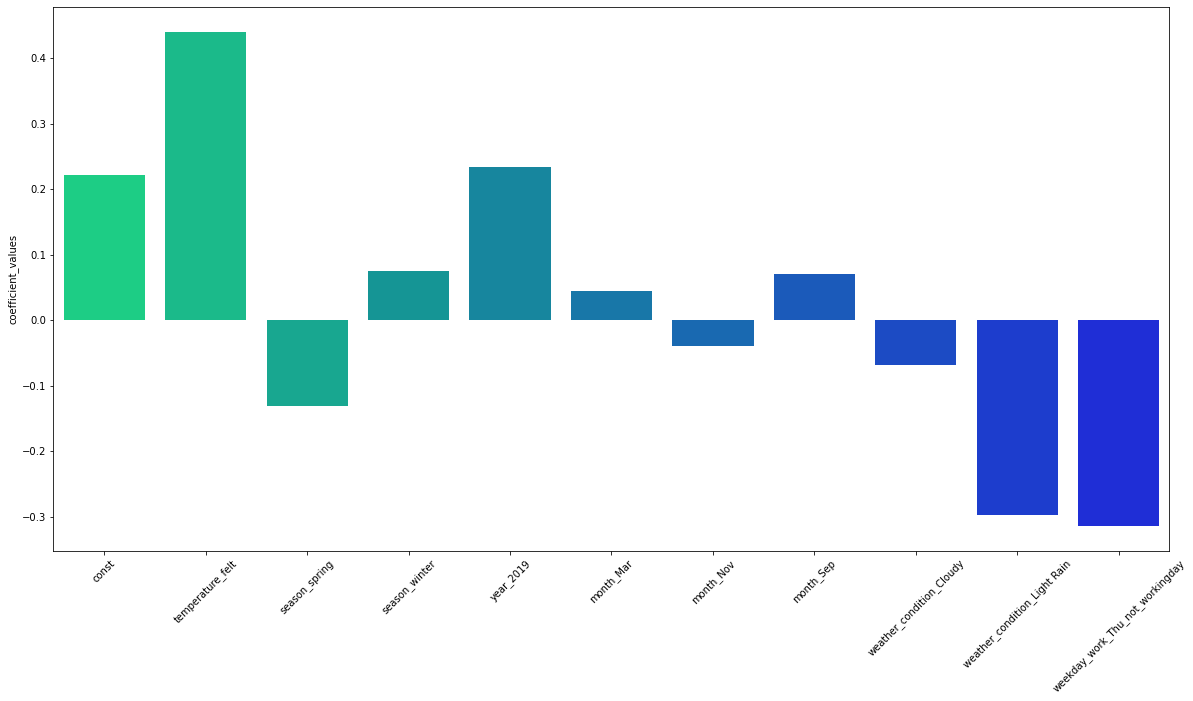

In [162]:
#viewing the effect of selected predictors in the final model:model_3
#calling the function
plot_predictors_coeff()